In [1]:
import pickle

file_name_x = 'X_trainingAll1.p'
file_name_y = 'Y_trainingAll1.p'
total_data_x = pickle.load(open(file_name_x, "rb"))
total_data_y = pickle.load(open(file_name_y, "rb"))

In [2]:
#the first step is to clean the data structure a little bit
#we are turning the datastructure from a pickle file to two matrices
#There is one matrix for training input data and one matrix for training label
#each row is an example and each column is a feature
import numpy as np

features_list = [feature for feature in total_data_x]
targets_list = [feature for feature in total_data_y]
Numsamples = len(total_data_x[features_list[0]])
Numfeatures = len(total_data_x)
Numtargets = len(total_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y[targets_list[j]][i][0]
            
total_data_x = x_data
total_data_y = y_data

In [3]:
total_data_x.shape,total_data_y.shape

((1031, 6), (1031, 12))

In [4]:
file_name_x = 'X_trainingAll2.p'
file_name_y = 'Y_trainingAll2.p'
total_data_x2 = pickle.load(open(file_name_x, "rb"))
total_data_y2 = pickle.load(open(file_name_y, "rb"))

In [5]:
#just transforming the data structure but for the second batch of GPT generated training data

features_list = [feature for feature in total_data_x2]
targets_list = [feature for feature in total_data_y2]
Numsamples = len(total_data_x2[features_list[0]])
Numfeatures = len(total_data_x2)
Numtargets = len(total_data_y2)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x2[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y2[targets_list[j]][i][0]
            
total_data_x2 = x_data
total_data_y2 = y_data

In [6]:
total_data_x2.shape,total_data_y2.shape

((2069, 6), (2069, 12))

In [7]:
file_name_x = 'X_trainingAll3.p'
file_name_y = 'Y_trainingAll3.p'
total_data_x3 = pickle.load(open(file_name_x, "rb"))
total_data_y3 = pickle.load(open(file_name_y, "rb"))

In [8]:
#just transforming the data structure but for the third batch of GPT generated training data


features_list = [feature for feature in total_data_x3]
targets_list = [feature for feature in total_data_y3]
Numsamples = len(total_data_x3[features_list[0]])
Numfeatures = len(total_data_x3)
Numtargets = len(total_data_y3)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x3[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y3[targets_list[j]][i][0]
            
total_data_x3 = x_data
total_data_y3 = y_data

In [9]:
total_data_x3.shape,total_data_y3.shape

((1061, 6), (1061, 12))

In [10]:
targets_list = new_targets_list

In [11]:
#so, we don't include px,x,y,py, and twiss gamma
total_data_y = total_data_y[:,~np.all(total_data_y == 0, axis=0)]
total_data_y2 = total_data_y2[:,~np.all(total_data_y2 == 0, axis=0)]

In [12]:
#just combining data into one large file
total_data_y=np.concatenate((total_data_y,total_data_y2),axis=0)
total_data_x=np.concatenate((total_data_x,total_data_x2),axis=0)

In [13]:
print('the max emittance before cleaning data is',max(total_data_y[:,0]))
print('the min emittance before cleaning data is',min(total_data_y[:,0]))

the max emittance before cleaning data is 2.1496871484843227
the min emittance before cleaning data is 0.1631729029301908


In [14]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(total_data_x[:,index]))
    print(min(total_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.500271284796115
-3.4998998372817263
 
the feature is sol_2_current
2.7997226527984225
1.8002290019167755
 
the feature is A3Quad_1_current
-6.000001333817787
-7.999294097181149
 
the feature is A3Quad_2_current
6.499712805247474
4.500395119388785
 
the feature is A3Quad_3_current
4.599514018514804
2.6000409515918976
 
the feature is A3Quad_4_current
-7.300949564186164
-9.299995437108834
 


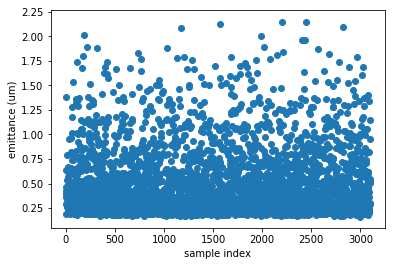

In [15]:
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance (um)')
plt.show()

In [16]:
max_allowed_emittance = 1

In [17]:
#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(total_data_y[:, features_index])
    std = np.std(total_data_y[:, features_index])
    
    for index in range(0, total_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if total_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    
    total_data_x = total_data_x[keep_index, :]
    total_data_y = total_data_y[keep_index, :]

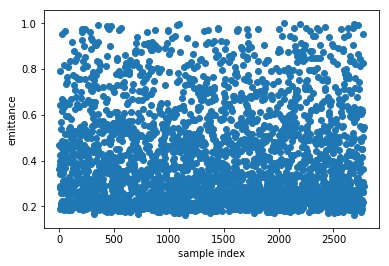

In [18]:
#now,let's check the emittance is below 1um
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance')
plt.show()

In [19]:
features_list

['sol_1_current',
 'sol_2_current',
 'A3Quad_1_current',
 'A3Quad_2_current',
 'A3Quad_3_current',
 'A3Quad_4_current']

In [20]:
#now, I am going to throw emittance away as an output because we don't need to use emittance
total_data_y=total_data_y[:,1::]

In [21]:
total_data_x.shape,total_data_y.shape

((2777, 6), (2777, 4))

In [22]:
#We now want to scale our data so that it goes from [-1,1] since we will use tanh activation function

scaled_total_data_x=((total_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
scaled_total_data_y=((total_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(scaled_total_data_y,axis=0), np.min(scaled_total_data_x,axis=0))
print('max for Y, X: ',np.max(scaled_total_data_y,axis=0), np.max(scaled_total_data_x,axis=0))

min for Y, X:  [-1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1.]
max for Y, X:  [1. 1. 1. 1.] [1. 1. 1. 1. 1. 1.]


In [23]:
class per_fold_object():
    def __init__(self,training_set,validation_set):
        self.train_index=training_set
        self.val_index=validation_set

In [24]:
ints = np.random.permutation(np.arange(0,total_data_x.shape[0],1,dtype=int))

fold_list=[]

k_fold=8
percent=1.0/k_fold
for index in range(0,k_fold):
    begin_index=np.int(total_data_x.shape[0]*percent*index) 
    finish_index=np.int(total_data_x.shape[0]*percent*(index+1)) 

    ints_test = ints[begin_index : finish_index]
    
    ints_train=[]
    for i in range(0,total_data_x.shape[0]):
        if not i in ints_test:
            ints_train.append(i)
    ints_train=np.asarray(ints_train)
    
    fold_list.append(per_fold_object(ints_train,ints_test))

In [25]:

seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.set_random_seed(seed_value)

from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

/Users/zuhaohua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from keras.regularizers import l2

In [27]:
model_1= Sequential()
model_1.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [28]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total para

In [29]:
scaled_total_data_y1=scaled_total_data_y[:,0]
scaled_total_data_y2=scaled_total_data_y[:,1]
scaled_total_data_y3=scaled_total_data_y[:,2]
scaled_total_data_y4=scaled_total_data_y[:,3]

In [30]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [31]:
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y1[fold_list[index].val_index]


history = model_1.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y1[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2429 samples, validate on 348 samples
Epoch 1/10000
 - 1s - loss: 0.0675 - mean_absolute_error: 0.1976 - mean_squared_error: 0.0675 - val_loss: 0.0396 - val_mean_absolute_error: 0.1594 - val_mean_squared_error: 0.0396
Epoch 2/10000
 - 0s - loss: 0.0391 - mean_absolute_error: 0.1518 - mean_squared_error: 0.0391 - val_loss: 0.0359 - val_mean_absolute_error: 0.1484 - val_mean_squared_error: 0.0359
Epoch 3/10000
 - 0s - loss: 0.0353 - mean_absolute_error: 0.1405 - mean_squared_error: 0.0353 - val_loss: 0.0296 - val_mean_absolute_error: 0.1317 - val_mean_squared_error: 0.0296
Epoch 4/10000
 - 0s - loss: 0.0252 - mean_absolute_error: 0.1187 - mean_squared_error: 0.0252 - val_loss: 0.0183 - val_mean_absolute_error: 0.1062 - val_mean_squared_error: 0.0183
Epoch 5/10000
 - 0s - loss: 0.0162 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0162 - val_loss: 0.0136 - val_mean_absolute_error: 0.0919 - val_mean_squared_error: 0.0136
Epoch 6/10000
 - 0s - loss: 0.0121 - mean_absolute_er

 - 0s - loss: 0.0026 - mean_absolute_error: 0.0365 - mean_squared_error: 0.0026 - val_loss: 0.0045 - val_mean_absolute_error: 0.0482 - val_mean_squared_error: 0.0045
Epoch 47/10000
 - 0s - loss: 0.0026 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_absolute_error: 0.0403 - val_mean_squared_error: 0.0028
Epoch 48/10000
 - 0s - loss: 0.0026 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_absolute_error: 0.0379 - val_mean_squared_error: 0.0027
Epoch 49/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0346 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_absolute_error: 0.0381 - val_mean_squared_error: 0.0026
Epoch 50/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0342 - mean_squared_error: 0.0023 - val_loss: 0.0033 - val_mean_absolute_error: 0.0431 - val_mean_squared_error: 0.0033
Epoch 51/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0347 - mean_squared_error: 0.0024 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0289 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_absolute_error: 0.0362 - val_mean_squared_error: 0.0024
Epoch 93/10000
 - 0s - loss: 0.0019 - mean_absolute_error: 0.0312 - mean_squared_error: 0.0019 - val_loss: 0.0025 - val_mean_absolute_error: 0.0364 - val_mean_squared_error: 0.0025
Epoch 94/10000
 - 0s - loss: 0.0018 - mean_absolute_error: 0.0304 - mean_squared_error: 0.0018 - val_loss: 0.0024 - val_mean_absolute_error: 0.0349 - val_mean_squared_error: 0.0024
Epoch 95/10000
 - 0s - loss: 0.0019 - mean_absolute_error: 0.0313 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_absolute_error: 0.0314 - val_mean_squared_error: 0.0019
Epoch 96/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_absolute_error: 0.0309 - val_mean_squared_error: 0.0018
Epoch 97/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0298 - mean_squared_error: 0.0017 

 - 0s - loss: 0.0012 - mean_absolute_error: 0.0244 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_absolute_error: 0.0244 - val_mean_squared_error: 0.0012
Epoch 138/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0234 - mean_squared_error: 0.0011 - val_loss: 0.0015 - val_mean_absolute_error: 0.0290 - val_mean_squared_error: 0.0015
Epoch 139/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0248 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_absolute_error: 0.0253 - val_mean_squared_error: 0.0013
Epoch 140/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0250 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_absolute_error: 0.0255 - val_mean_squared_error: 0.0013
Epoch 141/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0233 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 0.0012
Epoch 142/10000
 - 0s - loss: 9.9944e-04 - mean_absolute_error: 0.0220 - mean_squared_error: 9.9944e-04 - 

Epoch 181/10000
 - 0s - loss: 7.4823e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 7.4823e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0010
Epoch 182/10000
 - 0s - loss: 7.7617e-04 - mean_absolute_error: 0.0197 - mean_squared_error: 7.7617e-04 - val_loss: 9.1345e-04 - val_mean_absolute_error: 0.0209 - val_mean_squared_error: 9.1345e-04
Epoch 183/10000
 - 0s - loss: 6.9923e-04 - mean_absolute_error: 0.0180 - mean_squared_error: 6.9923e-04 - val_loss: 9.1518e-04 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 9.1518e-04
Epoch 184/10000
 - 0s - loss: 7.6517e-04 - mean_absolute_error: 0.0193 - mean_squared_error: 7.6517e-04 - val_loss: 7.8369e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 7.8369e-04
Epoch 185/10000
 - 0s - loss: 7.4490e-04 - mean_absolute_error: 0.0193 - mean_squared_error: 7.4490e-04 - val_loss: 8.0029e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 8.0029e-04
Epoch 186/10000
 -

Epoch 223/10000
 - 0s - loss: 5.4204e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.4204e-04 - val_loss: 6.4334e-04 - val_mean_absolute_error: 0.0182 - val_mean_squared_error: 6.4334e-04
Epoch 224/10000
 - 0s - loss: 5.1924e-04 - mean_absolute_error: 0.0158 - mean_squared_error: 5.1924e-04 - val_loss: 6.8011e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.8011e-04
Epoch 225/10000
 - 0s - loss: 5.2901e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.2901e-04 - val_loss: 6.1846e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 6.1846e-04
Epoch 226/10000
 - 0s - loss: 5.3672e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 5.3672e-04 - val_loss: 8.1516e-04 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 8.1516e-04
Epoch 227/10000
 - 0s - loss: 5.3251e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 5.3251e-04 - val_loss: 6.1491e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 6.1491e-04
Epoch 228/

Epoch 265/10000
 - 0s - loss: 4.4943e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.4943e-04 - val_loss: 6.9999e-04 - val_mean_absolute_error: 0.0197 - val_mean_squared_error: 6.9999e-04
Epoch 266/10000
 - 0s - loss: 3.8783e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.8783e-04 - val_loss: 8.2431e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 8.2431e-04
Epoch 267/10000
 - 0s - loss: 4.2809e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 4.2809e-04 - val_loss: 4.8770e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.8770e-04
Epoch 268/10000
 - 0s - loss: 3.7189e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.7189e-04 - val_loss: 5.2993e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 5.2993e-04
Epoch 269/10000
 - 0s - loss: 3.8978e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.8978e-04 - val_loss: 5.4728e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 5.4728e-04
Epoch 270/

Epoch 307/10000
 - 0s - loss: 3.2741e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.2741e-04 - val_loss: 4.9558e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.9558e-04
Epoch 308/10000
 - 0s - loss: 3.4523e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.4523e-04 - val_loss: 5.1330e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 5.1330e-04
Epoch 309/10000
 - 0s - loss: 4.2837e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.2837e-04 - val_loss: 6.0503e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 6.0503e-04
Epoch 310/10000
 - 0s - loss: 3.7352e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.7352e-04 - val_loss: 5.3331e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.3331e-04
Epoch 311/10000
 - 0s - loss: 3.1723e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1723e-04 - val_loss: 4.7398e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.7398e-04
Epoch 312/

Epoch 349/10000
 - 0s - loss: 3.0774e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 3.0774e-04 - val_loss: 5.5286e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 5.5286e-04
Epoch 350/10000
 - 0s - loss: 2.9306e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.9306e-04 - val_loss: 4.2086e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 4.2086e-04
Epoch 351/10000
 - 0s - loss: 3.2195e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.2195e-04 - val_loss: 6.0576e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 6.0576e-04
Epoch 352/10000
 - 0s - loss: 3.1592e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1592e-04 - val_loss: 4.7844e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 4.7844e-04
Epoch 353/10000
 - 0s - loss: 2.7883e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.7883e-04 - val_loss: 4.8929e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.8929e-04
Epoch 354/

Epoch 391/10000
 - 0s - loss: 2.6080e-04 - mean_absolute_error: 0.0117 - mean_squared_error: 2.6080e-04 - val_loss: 4.2327e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 4.2327e-04
Epoch 392/10000
 - 0s - loss: 2.6358e-04 - mean_absolute_error: 0.0117 - mean_squared_error: 2.6358e-04 - val_loss: 3.9722e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.9722e-04
Epoch 393/10000
 - 0s - loss: 2.4034e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.4034e-04 - val_loss: 4.4635e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.4635e-04
Epoch 394/10000
 - 0s - loss: 2.7041e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.7041e-04 - val_loss: 3.7822e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.7822e-04
Epoch 395/10000
 - 0s - loss: 2.5042e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.5042e-04 - val_loss: 4.2234e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 4.2234e-04
Epoch 396/

Epoch 433/10000
 - 0s - loss: 2.3489e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.3489e-04 - val_loss: 4.7650e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.7650e-04
Epoch 434/10000
 - 0s - loss: 3.7794e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.7794e-04 - val_loss: 6.8943e-04 - val_mean_absolute_error: 0.0183 - val_mean_squared_error: 6.8943e-04
Epoch 435/10000
 - 0s - loss: 2.6928e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.6928e-04 - val_loss: 4.8331e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.8331e-04
Epoch 436/10000
 - 0s - loss: 2.5673e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.5673e-04 - val_loss: 3.7691e-04 - val_mean_absolute_error: 0.0130 - val_mean_squared_error: 3.7691e-04
Epoch 437/10000
 - 0s - loss: 2.8581e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.8581e-04 - val_loss: 4.2937e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.2937e-04
Epoch 438/

Epoch 475/10000
 - 0s - loss: 2.5071e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.5071e-04 - val_loss: 3.4892e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.4892e-04
Epoch 476/10000
 - 0s - loss: 2.4683e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.4683e-04 - val_loss: 5.0095e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.0095e-04
Epoch 477/10000
 - 0s - loss: 2.7236e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.7236e-04 - val_loss: 4.3033e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.3033e-04
Epoch 478/10000
 - 0s - loss: 2.1763e-04 - mean_absolute_error: 0.0108 - mean_squared_error: 2.1763e-04 - val_loss: 4.1079e-04 - val_mean_absolute_error: 0.0129 - val_mean_squared_error: 4.1079e-04
Epoch 479/10000
 - 0s - loss: 2.0128e-04 - mean_absolute_error: 0.0101 - mean_squared_error: 2.0128e-04 - val_loss: 5.1899e-04 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 5.1899e-04
Epoch 480/

Epoch 517/10000
 - 0s - loss: 2.4618e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4618e-04 - val_loss: 3.8770e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.8770e-04
Epoch 518/10000
 - 0s - loss: 2.1733e-04 - mean_absolute_error: 0.0107 - mean_squared_error: 2.1733e-04 - val_loss: 3.8717e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.8717e-04
Epoch 519/10000
 - 0s - loss: 2.5240e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.5240e-04 - val_loss: 3.6748e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.6748e-04
Epoch 520/10000
 - 0s - loss: 1.9547e-04 - mean_absolute_error: 0.0101 - mean_squared_error: 1.9547e-04 - val_loss: 3.7651e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.7651e-04
Epoch 521/10000
 - 0s - loss: 2.0646e-04 - mean_absolute_error: 0.0104 - mean_squared_error: 2.0646e-04 - val_loss: 3.8180e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 3.8180e-04
Epoch 522/

Epoch 559/10000
 - 0s - loss: 1.8497e-04 - mean_absolute_error: 0.0098 - mean_squared_error: 1.8497e-04 - val_loss: 3.3704e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.3704e-04
Epoch 560/10000
 - 0s - loss: 1.8531e-04 - mean_absolute_error: 0.0097 - mean_squared_error: 1.8531e-04 - val_loss: 3.5474e-04 - val_mean_absolute_error: 0.0118 - val_mean_squared_error: 3.5474e-04


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

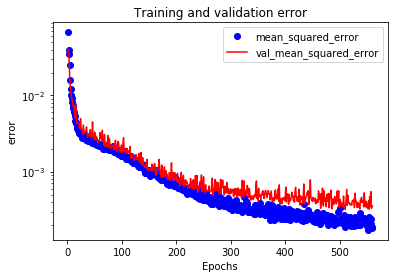

In [33]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [34]:
#now, let's test the performance of the first model

In [35]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [36]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [37]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [38]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

In [39]:
targets_list

['max_enxy', 'twiss_x_alpha', 'twiss_x_beta', 'twiss_y_alpha', 'twiss_y_beta']

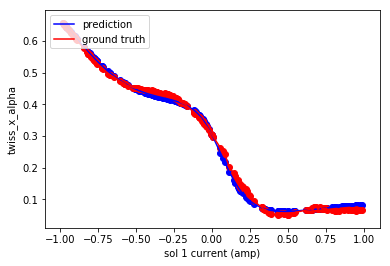

In [40]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [41]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [42]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [43]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
0.00017118562777285184
0.00017098613217991776
 
the feature is sol_2_current
-0.0399716948643154
-0.039971893923888335
 
the feature is A3Quad_1_current
-0.5005292809889976
-0.5005292907326065
 
the feature is A3Quad_2_current
-5.397074471191754e-05
-5.398070491413609e-05
 
the feature is A3Quad_3_current
0.0002225835360389894
0.0002225736848140425
 
the feature is A3Quad_4_current
0.9984322472742189
-0.9804788406400338
 


In [44]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [45]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

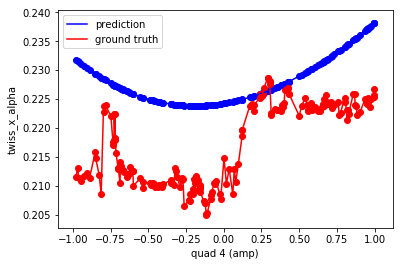

In [47]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

In [48]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [49]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [50]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [51]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

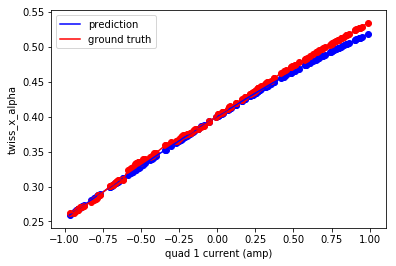

In [52]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we train the second model

In [53]:
model_2= Sequential()
model_2.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_2.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_2.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [55]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y2[fold_list[index].val_index]


history = model_2.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y2[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.1281 - mean_absolute_error: 0.2718 - mean_squared_error: 0.1281 - val_loss: 0.0465 - val_mean_absolute_error: 0.1759 - val_mean_squared_error: 0.0465
Epoch 2/10000
 - 0s - loss: 0.0416 - mean_absolute_error: 0.1642 - mean_squared_error: 0.0416 - val_loss: 0.0436 - val_mean_absolute_error: 0.1736 - val_mean_squared_error: 0.0436
Epoch 3/10000
 - 0s - loss: 0.0385 - mean_absolute_error: 0.1574 - mean_squared_error: 0.0385 - val_loss: 0.0408 - val_mean_absolute_error: 0.1645 - val_mean_squared_error: 0.0408
Epoch 4/10000
 - 0s - loss: 0.0328 - mean_absolute_error: 0.1417 - mean_squared_error: 0.0328 - val_loss: 0.0315 - val_mean_absolute_error: 0.1393 - val_mean_squared_error: 0.0315
Epoch 5/10000
 - 0s - loss: 0.0248 - mean_absolute_error: 0.1216 - mean_squared_error: 0.0248 - val_loss: 0.0261 - val_mean_absolute_error: 0.1273 - val_mean_squared_error: 0.0261
Epoch 6/10000
 - 0s - loss: 0.0204 - mean_absolute_er

 - 0s - loss: 0.0075 - mean_absolute_error: 0.0659 - mean_squared_error: 0.0075 - val_loss: 0.0070 - val_mean_absolute_error: 0.0633 - val_mean_squared_error: 0.0070
Epoch 47/10000
 - 0s - loss: 0.0074 - mean_absolute_error: 0.0651 - mean_squared_error: 0.0074 - val_loss: 0.0066 - val_mean_absolute_error: 0.0623 - val_mean_squared_error: 0.0066
Epoch 48/10000
 - 0s - loss: 0.0072 - mean_absolute_error: 0.0650 - mean_squared_error: 0.0072 - val_loss: 0.0068 - val_mean_absolute_error: 0.0632 - val_mean_squared_error: 0.0068
Epoch 49/10000
 - 0s - loss: 0.0075 - mean_absolute_error: 0.0656 - mean_squared_error: 0.0075 - val_loss: 0.0064 - val_mean_absolute_error: 0.0610 - val_mean_squared_error: 0.0064
Epoch 50/10000
 - 0s - loss: 0.0073 - mean_absolute_error: 0.0646 - mean_squared_error: 0.0073 - val_loss: 0.0064 - val_mean_absolute_error: 0.0623 - val_mean_squared_error: 0.0064
Epoch 51/10000
 - 0s - loss: 0.0071 - mean_absolute_error: 0.0637 - mean_squared_error: 0.0071 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0040 - mean_absolute_error: 0.0475 - mean_squared_error: 0.0040 - val_loss: 0.0033 - val_mean_absolute_error: 0.0417 - val_mean_squared_error: 0.0033
Epoch 93/10000
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0467 - mean_squared_error: 0.0038 - val_loss: 0.0036 - val_mean_absolute_error: 0.0442 - val_mean_squared_error: 0.0036
Epoch 94/10000
 - 0s - loss: 0.0039 - mean_absolute_error: 0.0467 - mean_squared_error: 0.0039 - val_loss: 0.0035 - val_mean_absolute_error: 0.0445 - val_mean_squared_error: 0.0035
Epoch 95/10000
 - 0s - loss: 0.0037 - mean_absolute_error: 0.0462 - mean_squared_error: 0.0037 - val_loss: 0.0036 - val_mean_absolute_error: 0.0463 - val_mean_squared_error: 0.0036
Epoch 96/10000
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0465 - mean_squared_error: 0.0038 - val_loss: 0.0031 - val_mean_absolute_error: 0.0413 - val_mean_squared_error: 0.0031
Epoch 97/10000
 - 0s - loss: 0.0035 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0035 

 - 0s - loss: 0.0020 - mean_absolute_error: 0.0331 - mean_squared_error: 0.0020 - val_loss: 0.0025 - val_mean_absolute_error: 0.0366 - val_mean_squared_error: 0.0025
Epoch 138/10000
 - 0s - loss: 0.0020 - mean_absolute_error: 0.0336 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_absolute_error: 0.0321 - val_mean_squared_error: 0.0021
Epoch 139/10000
 - 0s - loss: 0.0019 - mean_absolute_error: 0.0327 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_absolute_error: 0.0325 - val_mean_squared_error: 0.0019
Epoch 140/10000
 - 0s - loss: 0.0019 - mean_absolute_error: 0.0325 - mean_squared_error: 0.0019 - val_loss: 0.0021 - val_mean_absolute_error: 0.0335 - val_mean_squared_error: 0.0021
Epoch 141/10000
 - 0s - loss: 0.0018 - mean_absolute_error: 0.0319 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_absolute_error: 0.0323 - val_mean_squared_error: 0.0019
Epoch 142/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0311 - mean_squared_error: 0.0017 - val_loss

Epoch 183/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_absolute_error: 0.0288 - val_mean_squared_error: 0.0016
Epoch 184/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0261 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_absolute_error: 0.0266 - val_mean_squared_error: 0.0014
Epoch 185/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0257 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0014
Epoch 186/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0251 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_absolute_error: 0.0254 - val_mean_squared_error: 0.0013
Epoch 187/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0261 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_absolute_error: 0.0301 - val_mean_squared_error: 0.0017
Epoch 188/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0254 - mean_squared_error: 0

Epoch 228/10000
 - 0s - loss: 9.5363e-04 - mean_absolute_error: 0.0236 - mean_squared_error: 9.5363e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0254 - val_mean_squared_error: 0.0012
Epoch 229/10000
 - 0s - loss: 8.6179e-04 - mean_absolute_error: 0.0223 - mean_squared_error: 8.6179e-04 - val_loss: 9.2958e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 9.2958e-04
Epoch 230/10000
 - 0s - loss: 9.4906e-04 - mean_absolute_error: 0.0235 - mean_squared_error: 9.4906e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0242 - val_mean_squared_error: 0.0014
Epoch 231/10000
 - 0s - loss: 8.6491e-04 - mean_absolute_error: 0.0220 - mean_squared_error: 8.6491e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 0.0011
Epoch 232/10000
 - 0s - loss: 8.9577e-04 - mean_absolute_error: 0.0227 - mean_squared_error: 8.9577e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0225 - val_mean_squared_error: 0.0011
Epoch 233/10000
 - 0s - loss: 8.2296e-04 -

Epoch 271/10000
 - 0s - loss: 7.1149e-04 - mean_absolute_error: 0.0199 - mean_squared_error: 7.1149e-04 - val_loss: 8.7200e-04 - val_mean_absolute_error: 0.0203 - val_mean_squared_error: 8.7200e-04
Epoch 272/10000
 - 0s - loss: 6.9581e-04 - mean_absolute_error: 0.0197 - mean_squared_error: 6.9581e-04 - val_loss: 9.5274e-04 - val_mean_absolute_error: 0.0203 - val_mean_squared_error: 9.5274e-04
Epoch 273/10000
 - 0s - loss: 7.1807e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.1807e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0250 - val_mean_squared_error: 0.0012
Epoch 274/10000
 - 0s - loss: 7.1435e-04 - mean_absolute_error: 0.0201 - mean_squared_error: 7.1435e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 0.0011
Epoch 275/10000
 - 0s - loss: 7.7426e-04 - mean_absolute_error: 0.0210 - mean_squared_error: 7.7426e-04 - val_loss: 9.4768e-04 - val_mean_absolute_error: 0.0207 - val_mean_squared_error: 9.4768e-04
Epoch 276/10000
 - 0s - lo

Epoch 313/10000
 - 0s - loss: 5.9400e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 5.9400e-04 - val_loss: 7.8995e-04 - val_mean_absolute_error: 0.0208 - val_mean_squared_error: 7.8995e-04
Epoch 314/10000
 - 0s - loss: 6.1019e-04 - mean_absolute_error: 0.0182 - mean_squared_error: 6.1019e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 0.0010
Epoch 315/10000
 - 0s - loss: 6.2946e-04 - mean_absolute_error: 0.0189 - mean_squared_error: 6.2946e-04 - val_loss: 7.0217e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 7.0217e-04
Epoch 316/10000
 - 0s - loss: 6.1045e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 6.1045e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0214 - val_mean_squared_error: 0.0010
Epoch 317/10000
 - 0s - loss: 6.2909e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.2909e-04 - val_loss: 6.9051e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 6.9051e-04
Epoch 318/10000
 - 0s - lo

Epoch 355/10000
 - 0s - loss: 5.0780e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.0780e-04 - val_loss: 7.3974e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 7.3974e-04
Epoch 356/10000
 - 0s - loss: 5.4453e-04 - mean_absolute_error: 0.0174 - mean_squared_error: 5.4453e-04 - val_loss: 7.3285e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 7.3285e-04
Epoch 357/10000
 - 0s - loss: 5.3457e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.3457e-04 - val_loss: 7.2860e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 7.2860e-04
Epoch 358/10000
 - 0s - loss: 6.4408e-04 - mean_absolute_error: 0.0194 - mean_squared_error: 6.4408e-04 - val_loss: 7.5644e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 7.5644e-04
Epoch 359/10000
 - 0s - loss: 6.2739e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.2739e-04 - val_loss: 7.3706e-04 - val_mean_absolute_error: 0.0189 - val_mean_squared_error: 7.3706e-04
Epoch 360/

Epoch 397/10000
 - 0s - loss: 5.1696e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 5.1696e-04 - val_loss: 6.7896e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 6.7896e-04
Epoch 398/10000
 - 0s - loss: 4.5386e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.5386e-04 - val_loss: 6.7485e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 6.7485e-04
Epoch 399/10000
 - 0s - loss: 5.2684e-04 - mean_absolute_error: 0.0172 - mean_squared_error: 5.2684e-04 - val_loss: 7.0390e-04 - val_mean_absolute_error: 0.0183 - val_mean_squared_error: 7.0390e-04
Epoch 400/10000
 - 0s - loss: 5.3262e-04 - mean_absolute_error: 0.0174 - mean_squared_error: 5.3262e-04 - val_loss: 7.1462e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 7.1462e-04
Epoch 401/10000
 - 0s - loss: 5.1842e-04 - mean_absolute_error: 0.0169 - mean_squared_error: 5.1842e-04 - val_loss: 9.3435e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 9.3435e-04
Epoch 402/

Epoch 439/10000
 - 0s - loss: 3.9163e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 3.9163e-04 - val_loss: 5.6840e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 5.6840e-04
Epoch 440/10000
 - 0s - loss: 4.0440e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.0440e-04 - val_loss: 5.5222e-04 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 5.5222e-04
Epoch 441/10000
 - 0s - loss: 4.6459e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.6459e-04 - val_loss: 5.3667e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.3667e-04
Epoch 442/10000
 - 1s - loss: 4.1560e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.1560e-04 - val_loss: 6.5650e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 6.5650e-04
Epoch 443/10000
 - 0s - loss: 4.6342e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 4.6342e-04 - val_loss: 5.5537e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.5537e-04
Epoch 444/

Epoch 481/10000
 - 0s - loss: 4.4767e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 4.4767e-04 - val_loss: 5.9032e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 5.9032e-04
Epoch 482/10000
 - 0s - loss: 3.6660e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.6660e-04 - val_loss: 6.6494e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 6.6494e-04
Epoch 483/10000
 - 0s - loss: 4.3640e-04 - mean_absolute_error: 0.0158 - mean_squared_error: 4.3640e-04 - val_loss: 5.4852e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.4852e-04
Epoch 484/10000
 - 0s - loss: 3.9533e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 3.9533e-04 - val_loss: 6.5600e-04 - val_mean_absolute_error: 0.0174 - val_mean_squared_error: 6.5600e-04
Epoch 485/10000
 - 0s - loss: 3.8877e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 3.8877e-04 - val_loss: 6.8327e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 6.8327e-04
Epoch 486/

In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

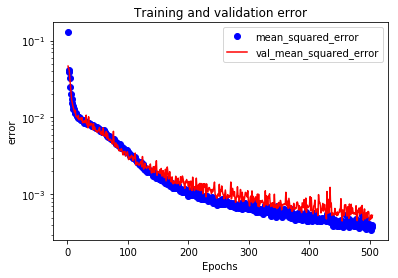

In [57]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [58]:
#now, let's test the performance of model 2

In [59]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [60]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [61]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [66]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

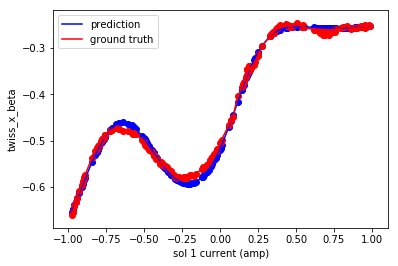

In [67]:
#now, we graph the result

#x_alpha

which_parameter_to_plot=1

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [68]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [69]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [70]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [71]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

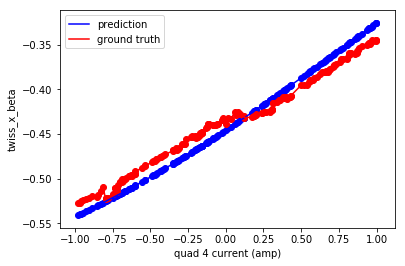

In [72]:
#now, we graph the result


which_parameter_to_plot=1

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [73]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [74]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [75]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [76]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

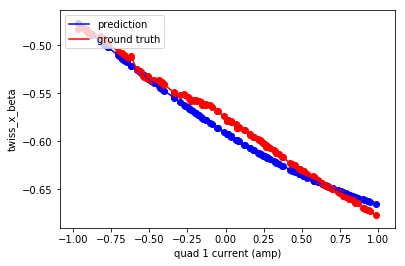

In [77]:
#now, we graph the result

which_parameter_to_plot=1

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to train model 3

In [78]:
model_3= Sequential()
model_3.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_3.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_3.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [79]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y3[fold_list[index].val_index]


history = model_3.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y3[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.1786 - mean_absolute_error: 0.3310 - mean_squared_error: 0.1786 - val_loss: 0.0900 - val_mean_absolute_error: 0.2269 - val_mean_squared_error: 0.0900
Epoch 2/10000
 - 0s - loss: 0.0871 - mean_absolute_error: 0.2278 - mean_squared_error: 0.0871 - val_loss: 0.0855 - val_mean_absolute_error: 0.2236 - val_mean_squared_error: 0.0855
Epoch 3/10000
 - 0s - loss: 0.0837 - mean_absolute_error: 0.2236 - mean_squared_error: 0.0837 - val_loss: 0.0802 - val_mean_absolute_error: 0.2111 - val_mean_squared_error: 0.0802
Epoch 4/10000
 - 0s - loss: 0.0784 - mean_absolute_error: 0.2139 - mean_squared_error: 0.0784 - val_loss: 0.0767 - val_mean_absolute_error: 0.2021 - val_mean_squared_error: 0.0767
Epoch 5/10000
 - 0s - loss: 0.0755 - mean_absolute_error: 0.2074 - mean_squared_error: 0.0755 - val_loss: 0.0738 - val_mean_absolute_error: 0.1959 - val_mean_squared_error: 0.0738
Epoch 6/10000
 - 0s - loss: 0.0724 - mean_absolute_er

 - 0s - loss: 0.0049 - mean_absolute_error: 0.0502 - mean_squared_error: 0.0049 - val_loss: 0.0050 - val_mean_absolute_error: 0.0508 - val_mean_squared_error: 0.0050
Epoch 47/10000
 - 0s - loss: 0.0047 - mean_absolute_error: 0.0494 - mean_squared_error: 0.0047 - val_loss: 0.0043 - val_mean_absolute_error: 0.0453 - val_mean_squared_error: 0.0043
Epoch 48/10000
 - 0s - loss: 0.0045 - mean_absolute_error: 0.0478 - mean_squared_error: 0.0045 - val_loss: 0.0045 - val_mean_absolute_error: 0.0491 - val_mean_squared_error: 0.0045
Epoch 49/10000
 - 0s - loss: 0.0048 - mean_absolute_error: 0.0502 - mean_squared_error: 0.0048 - val_loss: 0.0046 - val_mean_absolute_error: 0.0485 - val_mean_squared_error: 0.0046
Epoch 50/10000
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0480 - mean_squared_error: 0.0044 - val_loss: 0.0051 - val_mean_absolute_error: 0.0533 - val_mean_squared_error: 0.0051
Epoch 51/10000
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0476 - mean_squared_error: 0.0044 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0350 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_absolute_error: 0.0338 - val_mean_squared_error: 0.0023
Epoch 93/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0353 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_absolute_error: 0.0329 - val_mean_squared_error: 0.0023
Epoch 94/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0356 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_absolute_error: 0.0352 - val_mean_squared_error: 0.0024
Epoch 95/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0344 - mean_squared_error: 0.0022 - val_loss: 0.0025 - val_mean_absolute_error: 0.0336 - val_mean_squared_error: 0.0025
Epoch 96/10000
 - 0s - loss: 0.0022 - mean_absolute_error: 0.0343 - mean_squared_error: 0.0022 - val_loss: 0.0023 - val_mean_absolute_error: 0.0328 - val_mean_squared_error: 0.0023
Epoch 97/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0362 - mean_squared_error: 0.0024 

 - 0s - loss: 0.0018 - mean_absolute_error: 0.0316 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_absolute_error: 0.0304 - val_mean_squared_error: 0.0018
Epoch 138/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0286 - mean_squared_error: 0.0015 - val_loss: 0.0017 - val_mean_absolute_error: 0.0285 - val_mean_squared_error: 0.0017
Epoch 139/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0285 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0016
Epoch 140/10000
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0279 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0015
Epoch 141/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0262 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_absolute_error: 0.0275 - val_mean_squared_error: 0.0016
Epoch 142/10000
 - 0s - loss: 0.0014 - mean_absolute_error: 0.0271 - mean_squared_error: 0.0014 - val_loss

 - 0s - loss: 0.0011 - mean_absolute_error: 0.0238 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_absolute_error: 0.0246 - val_mean_squared_error: 0.0014
Epoch 183/10000
 - 0s - loss: 9.2373e-04 - mean_absolute_error: 0.0222 - mean_squared_error: 9.2373e-04 - val_loss: 0.0013 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0013
Epoch 184/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0247 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0014
Epoch 185/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0232 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_absolute_error: 0.0272 - val_mean_squared_error: 0.0014
Epoch 186/10000
 - 0s - loss: 9.2114e-04 - mean_absolute_error: 0.0221 - mean_squared_error: 9.2114e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0245 - val_mean_squared_error: 0.0012
Epoch 187/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0231 - mean_squared_error: 0

Epoch 226/10000
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0237 - mean_squared_error: 0.0010 - val_loss: 0.0014 - val_mean_absolute_error: 0.0257 - val_mean_squared_error: 0.0014
Epoch 227/10000
 - 0s - loss: 8.1415e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 8.1415e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0234 - val_mean_squared_error: 0.0012
Epoch 228/10000
 - 0s - loss: 7.7507e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.7507e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0240 - val_mean_squared_error: 0.0012
Epoch 229/10000
 - 0s - loss: 8.2713e-04 - mean_absolute_error: 0.0210 - mean_squared_error: 8.2713e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0230 - val_mean_squared_error: 0.0011
Epoch 230/10000
 - 0s - loss: 8.2658e-04 - mean_absolute_error: 0.0212 - mean_squared_error: 8.2658e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 0.0011
Epoch 231/10000
 - 0s - loss: 8.3708e-04 - mean_absolute_e

Epoch 270/10000
 - 0s - loss: 8.5133e-04 - mean_absolute_error: 0.0215 - mean_squared_error: 8.5133e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 0.0010
Epoch 271/10000
 - 0s - loss: 7.2822e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.2822e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0226 - val_mean_squared_error: 0.0012
Epoch 272/10000
 - 0s - loss: 7.4478e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.4478e-04 - val_loss: 9.5768e-04 - val_mean_absolute_error: 0.0207 - val_mean_squared_error: 9.5768e-04
Epoch 273/10000
 - 0s - loss: 8.7484e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 8.7484e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 0.0011
Epoch 274/10000
 - 0s - loss: 7.6512e-04 - mean_absolute_error: 0.0203 - mean_squared_error: 7.6512e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0220 - val_mean_squared_error: 0.0011
Epoch 275/10000
 - 0s - loss: 7.5515e-04 -

Epoch 313/10000
 - 0s - loss: 6.7810e-04 - mean_absolute_error: 0.0190 - mean_squared_error: 6.7810e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 0.0011
Epoch 314/10000
 - 0s - loss: 8.4436e-04 - mean_absolute_error: 0.0212 - mean_squared_error: 8.4436e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0259 - val_mean_squared_error: 0.0011
Epoch 315/10000
 - 0s - loss: 6.8076e-04 - mean_absolute_error: 0.0192 - mean_squared_error: 6.8076e-04 - val_loss: 8.8249e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 8.8249e-04
Epoch 316/10000
 - 0s - loss: 6.0863e-04 - mean_absolute_error: 0.0183 - mean_squared_error: 6.0863e-04 - val_loss: 8.5612e-04 - val_mean_absolute_error: 0.0194 - val_mean_squared_error: 8.5612e-04
Epoch 317/10000
 - 0s - loss: 6.3503e-04 - mean_absolute_error: 0.0185 - mean_squared_error: 6.3503e-04 - val_loss: 8.6213e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 8.6213e-04
Epoch 318/10000
 - 0s - lo

Epoch 355/10000
 - 0s - loss: 5.6812e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.6812e-04 - val_loss: 7.9445e-04 - val_mean_absolute_error: 0.0199 - val_mean_squared_error: 7.9445e-04
Epoch 356/10000
 - 0s - loss: 4.9627e-04 - mean_absolute_error: 0.0166 - mean_squared_error: 4.9627e-04 - val_loss: 8.0419e-04 - val_mean_absolute_error: 0.0200 - val_mean_squared_error: 8.0419e-04
Epoch 357/10000
 - 0s - loss: 5.9965e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 5.9965e-04 - val_loss: 8.5265e-04 - val_mean_absolute_error: 0.0208 - val_mean_squared_error: 8.5265e-04
Epoch 358/10000
 - 0s - loss: 7.8433e-04 - mean_absolute_error: 0.0207 - mean_squared_error: 7.8433e-04 - val_loss: 8.1813e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 8.1813e-04
Epoch 359/10000
 - 0s - loss: 5.6401e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.6401e-04 - val_loss: 7.5610e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 7.5610e-04
Epoch 360/

Epoch 397/10000
 - 0s - loss: 6.6745e-04 - mean_absolute_error: 0.0190 - mean_squared_error: 6.6745e-04 - val_loss: 7.3346e-04 - val_mean_absolute_error: 0.0194 - val_mean_squared_error: 7.3346e-04
Epoch 398/10000
 - 0s - loss: 6.7324e-04 - mean_absolute_error: 0.0189 - mean_squared_error: 6.7324e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0224 - val_mean_squared_error: 0.0011
Epoch 399/10000
 - 0s - loss: 6.6523e-04 - mean_absolute_error: 0.0190 - mean_squared_error: 6.6523e-04 - val_loss: 8.5739e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 8.5739e-04
Epoch 400/10000
 - 0s - loss: 5.6244e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.6244e-04 - val_loss: 6.8463e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 6.8463e-04
Epoch 401/10000
 - 0s - loss: 6.0693e-04 - mean_absolute_error: 0.0181 - mean_squared_error: 6.0693e-04 - val_loss: 9.0355e-04 - val_mean_absolute_error: 0.0208 - val_mean_squared_error: 9.0355e-04
Epoch 402/10000
 -

Epoch 439/10000
 - 0s - loss: 4.7739e-04 - mean_absolute_error: 0.0161 - mean_squared_error: 4.7739e-04 - val_loss: 6.1897e-04 - val_mean_absolute_error: 0.0178 - val_mean_squared_error: 6.1897e-04
Epoch 440/10000
 - 0s - loss: 4.8269e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.8269e-04 - val_loss: 6.0644e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 6.0644e-04
Epoch 441/10000
 - 0s - loss: 4.7319e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 4.7319e-04 - val_loss: 6.7405e-04 - val_mean_absolute_error: 0.0182 - val_mean_squared_error: 6.7405e-04
Epoch 442/10000
 - 0s - loss: 4.9221e-04 - mean_absolute_error: 0.0164 - mean_squared_error: 4.9221e-04 - val_loss: 6.5071e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 6.5071e-04
Epoch 443/10000
 - 0s - loss: 6.3209e-04 - mean_absolute_error: 0.0187 - mean_squared_error: 6.3209e-04 - val_loss: 6.4840e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 6.4840e-04
Epoch 444/

Epoch 481/10000
 - 0s - loss: 4.4692e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.4692e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0012
Epoch 482/10000
 - 0s - loss: 5.0557e-04 - mean_absolute_error: 0.0165 - mean_squared_error: 5.0557e-04 - val_loss: 6.8856e-04 - val_mean_absolute_error: 0.0178 - val_mean_squared_error: 6.8856e-04
Epoch 483/10000
 - 0s - loss: 4.2527e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.2527e-04 - val_loss: 5.8968e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 5.8968e-04
Epoch 484/10000
 - 0s - loss: 4.5426e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 4.5426e-04 - val_loss: 5.4326e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 5.4326e-04
Epoch 485/10000
 - 0s - loss: 5.9721e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 5.9721e-04 - val_loss: 6.8219e-04 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 6.8219e-04
Epoch 486/10000
 -

Epoch 523/10000
 - 0s - loss: 4.4901e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.4901e-04 - val_loss: 5.4605e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.4605e-04
Epoch 524/10000
 - 0s - loss: 4.1361e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 4.1361e-04 - val_loss: 5.0030e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 5.0030e-04
Epoch 525/10000
 - 0s - loss: 4.2766e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.2766e-04 - val_loss: 5.4901e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.4901e-04
Epoch 526/10000
 - 0s - loss: 3.8667e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.8667e-04 - val_loss: 8.3542e-04 - val_mean_absolute_error: 0.0207 - val_mean_squared_error: 8.3542e-04
Epoch 527/10000
 - 0s - loss: 4.3063e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.3063e-04 - val_loss: 5.8642e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.8642e-04
Epoch 528/

In [80]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

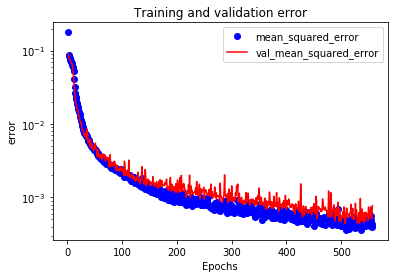

In [81]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [82]:
#now, let's test the performance of model 3

In [83]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [84]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [85]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [87]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

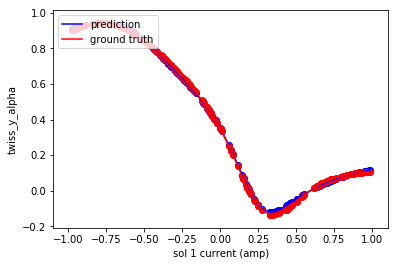

In [88]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [89]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [90]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [91]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [92]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

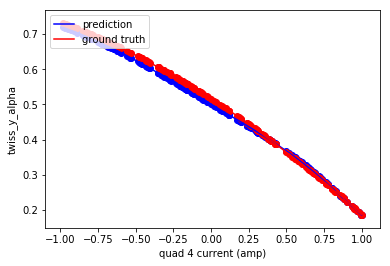

In [94]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [95]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [96]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [97]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [100]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

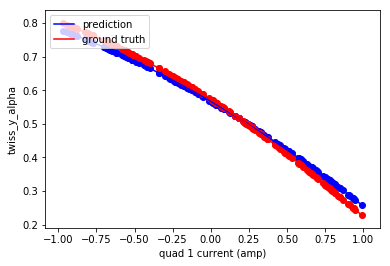

In [101]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to do model 4

In [102]:
model_4= Sequential()
model_4.add(Dense(16, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(4, activation='tanh',activity_regularizer=l2(0.00)))
model_4.add(Dense(1, activation='linear',activity_regularizer=l2(0.00)))
model_4.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [103]:
index=0
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y4[fold_list[index].val_index]


history = model_4.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y4[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2430 samples, validate on 347 samples
Epoch 1/10000
 - 1s - loss: 0.2150 - mean_absolute_error: 0.3836 - mean_squared_error: 0.2150 - val_loss: 0.1154 - val_mean_absolute_error: 0.2648 - val_mean_squared_error: 0.1154
Epoch 2/10000
 - 0s - loss: 0.1057 - mean_absolute_error: 0.2497 - mean_squared_error: 0.1057 - val_loss: 0.1045 - val_mean_absolute_error: 0.2508 - val_mean_squared_error: 0.1045
Epoch 3/10000
 - 0s - loss: 0.0988 - mean_absolute_error: 0.2405 - mean_squared_error: 0.0988 - val_loss: 0.0982 - val_mean_absolute_error: 0.2370 - val_mean_squared_error: 0.0982
Epoch 4/10000
 - 0s - loss: 0.0948 - mean_absolute_error: 0.2341 - mean_squared_error: 0.0948 - val_loss: 0.0922 - val_mean_absolute_error: 0.2268 - val_mean_squared_error: 0.0922
Epoch 5/10000
 - 0s - loss: 0.0930 - mean_absolute_error: 0.2308 - mean_squared_error: 0.0930 - val_loss: 0.0915 - val_mean_absolute_error: 0.2295 - val_mean_squared_error: 0.0915
Epoch 6/10000
 - 0s - loss: 0.0906 - mean_absolute_er

 - 0s - loss: 0.0068 - mean_absolute_error: 0.0577 - mean_squared_error: 0.0068 - val_loss: 0.0078 - val_mean_absolute_error: 0.0592 - val_mean_squared_error: 0.0078
Epoch 47/10000
 - 0s - loss: 0.0065 - mean_absolute_error: 0.0561 - mean_squared_error: 0.0065 - val_loss: 0.0075 - val_mean_absolute_error: 0.0635 - val_mean_squared_error: 0.0075
Epoch 48/10000
 - 0s - loss: 0.0062 - mean_absolute_error: 0.0556 - mean_squared_error: 0.0062 - val_loss: 0.0066 - val_mean_absolute_error: 0.0578 - val_mean_squared_error: 0.0066
Epoch 49/10000
 - 0s - loss: 0.0061 - mean_absolute_error: 0.0548 - mean_squared_error: 0.0061 - val_loss: 0.0066 - val_mean_absolute_error: 0.0581 - val_mean_squared_error: 0.0066
Epoch 50/10000
 - 0s - loss: 0.0058 - mean_absolute_error: 0.0538 - mean_squared_error: 0.0058 - val_loss: 0.0062 - val_mean_absolute_error: 0.0581 - val_mean_squared_error: 0.0062
Epoch 51/10000
 - 0s - loss: 0.0057 - mean_absolute_error: 0.0534 - mean_squared_error: 0.0057 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0025 - mean_absolute_error: 0.0352 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_absolute_error: 0.0416 - val_mean_squared_error: 0.0034
Epoch 93/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0341 - mean_squared_error: 0.0023 - val_loss: 0.0027 - val_mean_absolute_error: 0.0381 - val_mean_squared_error: 0.0027
Epoch 94/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0346 - mean_squared_error: 0.0023 - val_loss: 0.0034 - val_mean_absolute_error: 0.0396 - val_mean_squared_error: 0.0034
Epoch 95/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0342 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_absolute_error: 0.0364 - val_mean_squared_error: 0.0026
Epoch 96/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0348 - mean_squared_error: 0.0024 - val_loss: 0.0029 - val_mean_absolute_error: 0.0386 - val_mean_squared_error: 0.0029
Epoch 97/10000
 - 0s - loss: 0.0025 - mean_absolute_error: 0.0364 - mean_squared_error: 0.0025 

 - 0s - loss: 0.0017 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_absolute_error: 0.0312 - val_mean_squared_error: 0.0018
Epoch 138/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0017 - val_loss: 0.0023 - val_mean_absolute_error: 0.0343 - val_mean_squared_error: 0.0023
Epoch 139/10000
 - 0s - loss: 0.0016 - mean_absolute_error: 0.0287 - mean_squared_error: 0.0016 - val_loss: 0.0022 - val_mean_absolute_error: 0.0343 - val_mean_squared_error: 0.0022
Epoch 140/10000
 - 0s - loss: 0.0016 - mean_absolute_error: 0.0290 - mean_squared_error: 0.0016 - val_loss: 0.0016 - val_mean_absolute_error: 0.0306 - val_mean_squared_error: 0.0016
Epoch 141/10000
 - 0s - loss: 0.0017 - mean_absolute_error: 0.0299 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_absolute_error: 0.0311 - val_mean_squared_error: 0.0018
Epoch 142/10000
 - 0s - loss: 0.0018 - mean_absolute_error: 0.0306 - mean_squared_error: 0.0018 - val_loss

Epoch 183/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0250 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0012
Epoch 184/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0246 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_absolute_error: 0.0254 - val_mean_squared_error: 0.0013
Epoch 185/10000
 - 1s - loss: 0.0011 - mean_absolute_error: 0.0242 - mean_squared_error: 0.0011 - val_loss: 0.0014 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0014
Epoch 186/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0249 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0013
Epoch 187/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0250 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_absolute_error: 0.0276 - val_mean_squared_error: 0.0015
Epoch 188/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0249 - mean_squared_error: 0

Epoch 228/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0239 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0254 - val_mean_squared_error: 0.0012
Epoch 229/10000
 - 0s - loss: 9.3547e-04 - mean_absolute_error: 0.0224 - mean_squared_error: 9.3547e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0234 - val_mean_squared_error: 0.0011
Epoch 230/10000
 - 0s - loss: 9.1712e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 9.1712e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0246 - val_mean_squared_error: 0.0012
Epoch 231/10000
 - 0s - loss: 9.2456e-04 - mean_absolute_error: 0.0218 - mean_squared_error: 9.2456e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0238 - val_mean_squared_error: 0.0011
Epoch 232/10000
 - 0s - loss: 9.1533e-04 - mean_absolute_error: 0.0217 - mean_squared_error: 9.1533e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0229 - val_mean_squared_error: 0.0010
Epoch 233/10000
 - 0s - loss: 0.0012 - mean_absolute_error

Epoch 272/10000
 - 0s - loss: 7.8614e-04 - mean_absolute_error: 0.0200 - mean_squared_error: 7.8614e-04 - val_loss: 9.2244e-04 - val_mean_absolute_error: 0.0211 - val_mean_squared_error: 9.2244e-04
Epoch 273/10000
 - 0s - loss: 7.6498e-04 - mean_absolute_error: 0.0203 - mean_squared_error: 7.6498e-04 - val_loss: 9.8037e-04 - val_mean_absolute_error: 0.0216 - val_mean_squared_error: 9.8037e-04
Epoch 274/10000
 - 0s - loss: 8.5056e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 8.5056e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 0.0011
Epoch 275/10000
 - 0s - loss: 8.4257e-04 - mean_absolute_error: 0.0213 - mean_squared_error: 8.4257e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0244 - val_mean_squared_error: 0.0011
Epoch 276/10000
 - 0s - loss: 7.8885e-04 - mean_absolute_error: 0.0203 - mean_squared_error: 7.8885e-04 - val_loss: 9.2339e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 9.2339e-04
Epoch 277/10000
 - 0s - lo

Epoch 315/10000
 - 0s - loss: 8.4518e-04 - mean_absolute_error: 0.0210 - mean_squared_error: 8.4518e-04 - val_loss: 9.6034e-04 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 9.6034e-04
Epoch 316/10000
 - 0s - loss: 6.9509e-04 - mean_absolute_error: 0.0187 - mean_squared_error: 6.9509e-04 - val_loss: 9.3228e-04 - val_mean_absolute_error: 0.0219 - val_mean_squared_error: 9.3228e-04
Epoch 317/10000
 - 0s - loss: 7.7674e-04 - mean_absolute_error: 0.0200 - mean_squared_error: 7.7674e-04 - val_loss: 9.8338e-04 - val_mean_absolute_error: 0.0213 - val_mean_squared_error: 9.8338e-04
Epoch 318/10000
 - 0s - loss: 7.7397e-04 - mean_absolute_error: 0.0199 - mean_squared_error: 7.7397e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 0.0011
Epoch 319/10000
 - 0s - loss: 8.8108e-04 - mean_absolute_error: 0.0216 - mean_squared_error: 8.8108e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0250 - val_mean_squared_error: 0.0011
Epoch 320/10000
 - 0s - lo

Epoch 357/10000
 - 0s - loss: 8.2799e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 8.2799e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0014
Epoch 358/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0239 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_absolute_error: 0.0261 - val_mean_squared_error: 0.0012
Epoch 359/10000
 - 0s - loss: 6.9725e-04 - mean_absolute_error: 0.0189 - mean_squared_error: 6.9725e-04 - val_loss: 7.4555e-04 - val_mean_absolute_error: 0.0192 - val_mean_squared_error: 7.4555e-04
Epoch 360/10000
 - 0s - loss: 6.4959e-04 - mean_absolute_error: 0.0183 - mean_squared_error: 6.4959e-04 - val_loss: 7.4459e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 7.4459e-04
Epoch 361/10000
 - 0s - loss: 6.1507e-04 - mean_absolute_error: 0.0177 - mean_squared_error: 6.1507e-04 - val_loss: 8.2638e-04 - val_mean_absolute_error: 0.0197 - val_mean_squared_error: 8.2638e-04
Epoch 362/10000
 - 0s - loss: 7.16

Epoch 399/10000
 - 0s - loss: 5.8941e-04 - mean_absolute_error: 0.0174 - mean_squared_error: 5.8941e-04 - val_loss: 7.9257e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 7.9257e-04
Epoch 400/10000
 - 0s - loss: 6.3816e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 6.3816e-04 - val_loss: 7.4717e-04 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 7.4717e-04
Epoch 401/10000
 - 0s - loss: 5.6174e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 5.6174e-04 - val_loss: 8.6554e-04 - val_mean_absolute_error: 0.0206 - val_mean_squared_error: 8.6554e-04
Epoch 402/10000
 - 0s - loss: 8.3512e-04 - mean_absolute_error: 0.0207 - mean_squared_error: 8.3512e-04 - val_loss: 0.0023 - val_mean_absolute_error: 0.0326 - val_mean_squared_error: 0.0023
Epoch 403/10000
 - 0s - loss: 8.8570e-04 - mean_absolute_error: 0.0211 - mean_squared_error: 8.8570e-04 - val_loss: 8.5692e-04 - val_mean_absolute_error: 0.0210 - val_mean_squared_error: 8.5692e-04
Epoch 404/10000
 -

Epoch 441/10000
 - 0s - loss: 5.8802e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.8802e-04 - val_loss: 8.7866e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 8.7866e-04
Epoch 442/10000
 - 0s - loss: 5.6703e-04 - mean_absolute_error: 0.0170 - mean_squared_error: 5.6703e-04 - val_loss: 7.3834e-04 - val_mean_absolute_error: 0.0187 - val_mean_squared_error: 7.3834e-04
Epoch 443/10000
 - 0s - loss: 6.3862e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 6.3862e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 0.0011
Epoch 444/10000
 - 0s - loss: 8.2555e-04 - mean_absolute_error: 0.0206 - mean_squared_error: 8.2555e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0237 - val_mean_squared_error: 0.0012
Epoch 445/10000
 - 0s - loss: 6.5661e-04 - mean_absolute_error: 0.0185 - mean_squared_error: 6.5661e-04 - val_loss: 0.0010 - val_mean_absolute_error: 0.0222 - val_mean_squared_error: 0.0010
Epoch 446/10000
 - 0s - loss: 5.72

Epoch 483/10000
 - 0s - loss: 5.0901e-04 - mean_absolute_error: 0.0161 - mean_squared_error: 5.0901e-04 - val_loss: 5.4147e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.4147e-04
Epoch 484/10000
 - 0s - loss: 5.2307e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.2307e-04 - val_loss: 5.9255e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.9255e-04
Epoch 485/10000
 - 0s - loss: 5.2656e-04 - mean_absolute_error: 0.0165 - mean_squared_error: 5.2656e-04 - val_loss: 7.0362e-04 - val_mean_absolute_error: 0.0182 - val_mean_squared_error: 7.0362e-04
Epoch 486/10000
 - 0s - loss: 5.4032e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 5.4032e-04 - val_loss: 6.8010e-04 - val_mean_absolute_error: 0.0189 - val_mean_squared_error: 6.8010e-04
Epoch 487/10000
 - 0s - loss: 7.6109e-04 - mean_absolute_error: 0.0202 - mean_squared_error: 7.6109e-04 - val_loss: 7.7676e-04 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 7.7676e-04
Epoch 488/

Epoch 525/10000
 - 0s - loss: 5.2823e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.2823e-04 - val_loss: 7.7996e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 7.7996e-04
Epoch 526/10000
 - 0s - loss: 5.1726e-04 - mean_absolute_error: 0.0164 - mean_squared_error: 5.1726e-04 - val_loss: 6.1348e-04 - val_mean_absolute_error: 0.0175 - val_mean_squared_error: 6.1348e-04
Epoch 527/10000
 - 0s - loss: 4.8828e-04 - mean_absolute_error: 0.0157 - mean_squared_error: 4.8828e-04 - val_loss: 8.0536e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 8.0536e-04
Epoch 528/10000
 - 0s - loss: 5.4635e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.4635e-04 - val_loss: 7.1328e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 7.1328e-04
Epoch 529/10000
 - 0s - loss: 5.1490e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 5.1490e-04 - val_loss: 6.3532e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 6.3532e-04
Epoch 530/

Epoch 567/10000
 - 0s - loss: 4.6260e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.6260e-04 - val_loss: 6.6100e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 6.6100e-04
Epoch 568/10000
 - 0s - loss: 4.3997e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.3997e-04 - val_loss: 5.3100e-04 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 5.3100e-04
Epoch 569/10000
 - 0s - loss: 4.8920e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.8920e-04 - val_loss: 6.4088e-04 - val_mean_absolute_error: 0.0175 - val_mean_squared_error: 6.4088e-04
Epoch 570/10000
 - 0s - loss: 5.2019e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.2019e-04 - val_loss: 7.2999e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 7.2999e-04
Epoch 571/10000
 - 0s - loss: 5.0552e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 5.0552e-04 - val_loss: 6.7855e-04 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 6.7855e-04
Epoch 572/

Epoch 609/10000
 - 0s - loss: 5.2175e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 5.2175e-04 - val_loss: 5.5890e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.5890e-04
Epoch 610/10000
 - 0s - loss: 4.3636e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.3636e-04 - val_loss: 5.4120e-04 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 5.4120e-04
Epoch 611/10000
 - 0s - loss: 4.4525e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.4525e-04 - val_loss: 6.6112e-04 - val_mean_absolute_error: 0.0175 - val_mean_squared_error: 6.6112e-04
Epoch 612/10000
 - 0s - loss: 5.0538e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.0538e-04 - val_loss: 5.7485e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.7485e-04
Epoch 613/10000
 - 0s - loss: 5.0787e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.0787e-04 - val_loss: 6.2582e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 6.2582e-04
Epoch 614/

Epoch 651/10000
 - 0s - loss: 4.6033e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.6033e-04 - val_loss: 5.7334e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 5.7334e-04
Epoch 652/10000
 - 0s - loss: 4.5622e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.5622e-04 - val_loss: 5.1835e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 5.1835e-04
Epoch 653/10000
 - 0s - loss: 4.4128e-04 - mean_absolute_error: 0.0147 - mean_squared_error: 4.4128e-04 - val_loss: 5.3460e-04 - val_mean_absolute_error: 0.0164 - val_mean_squared_error: 5.3460e-04
Epoch 654/10000
 - 0s - loss: 5.2095e-04 - mean_absolute_error: 0.0162 - mean_squared_error: 5.2095e-04 - val_loss: 5.6561e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.6561e-04
Epoch 655/10000
 - 0s - loss: 4.0464e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 4.0464e-04 - val_loss: 6.1842e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 6.1842e-04
Epoch 656/

Epoch 693/10000
 - 0s - loss: 4.1084e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 4.1084e-04 - val_loss: 5.7887e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.7887e-04


In [104]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

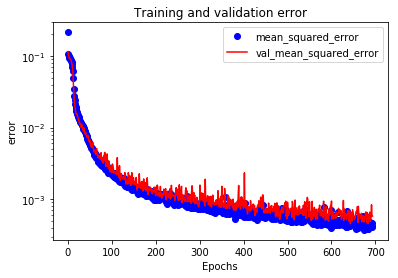

In [105]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

In [106]:
#now, let's test the performance of model 4

In [107]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [108]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [109]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [110]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

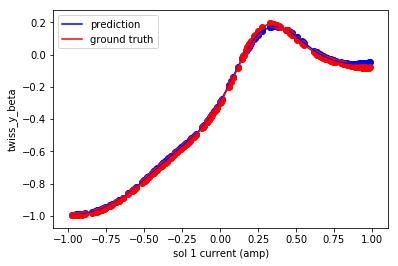

In [111]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [112]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [113]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [114]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [115]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

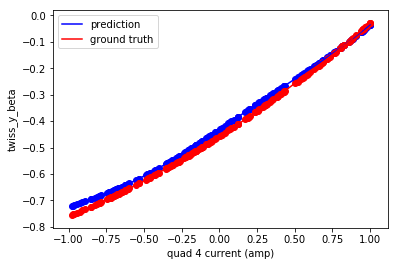

In [116]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [117]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [118]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [119]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [120]:
total_predict_data=np.zeros((test_data_y.shape[0],1))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

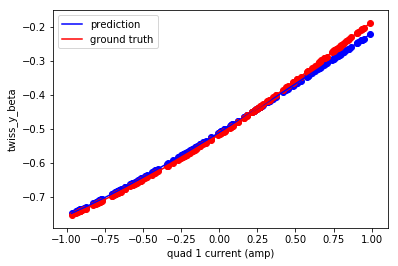

In [121]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,0],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,0],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to see how the model does when all parameters are varying

In [122]:
#now, let's see what happens when we vary all 6 input parameters

#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_all.p'
file_name_y = 'Y_test_all.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [123]:
#now, we want to know the input parameter range for this testing dataset

for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.5130218153905384
-3.4965535186125267
 
the feature is sol_2_current
2.7940099515853354
1.8031387429141603
 
the feature is A3Quad_1_current
-6.000577886535028
-7.997092421179527
 
the feature is A3Quad_2_current
6.498662389174472
4.505091637355917
 
the feature is A3Quad_3_current
4.590131038557003
2.6117306495442656
 
the feature is A3Quad_4_current
-7.318531220712396
-9.276508929364423
 


In [124]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [-1.03700062 -0.99562903 -0.51861037 -0.98572975] [-0.99330488 -0.99417757 -0.99779755 -0.99530188 -0.98830722 -0.97650228]
max for Y, X:  [0.91356605 0.8760724  0.99604475 0.85665049] [0.97448946 0.98856881 0.99942324 0.99894923 0.99061455 0.98240995]


In [125]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

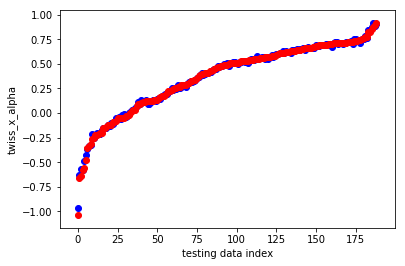

In [127]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=0


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [128]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_2.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

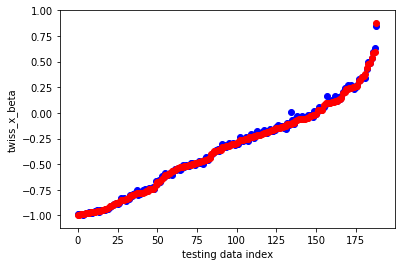

In [129]:
which_parameter_to_plot=1


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [130]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_3.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

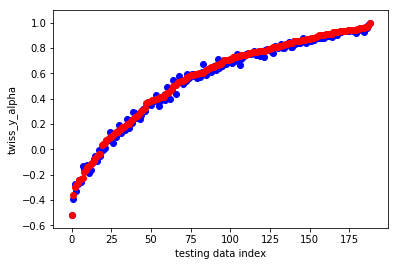

In [131]:
which_parameter_to_plot=2


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [132]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_4.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

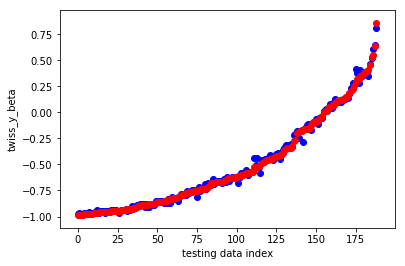

In [133]:
which_parameter_to_plot=3


#i can sort the data according to the y label
sort_index=np.argsort(test_data_y[:,which_parameter_to_plot])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]
total_predict_data=total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()